In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

E:\anaconda3\envs\jcopdl\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from luwiji.neural_network import illustration

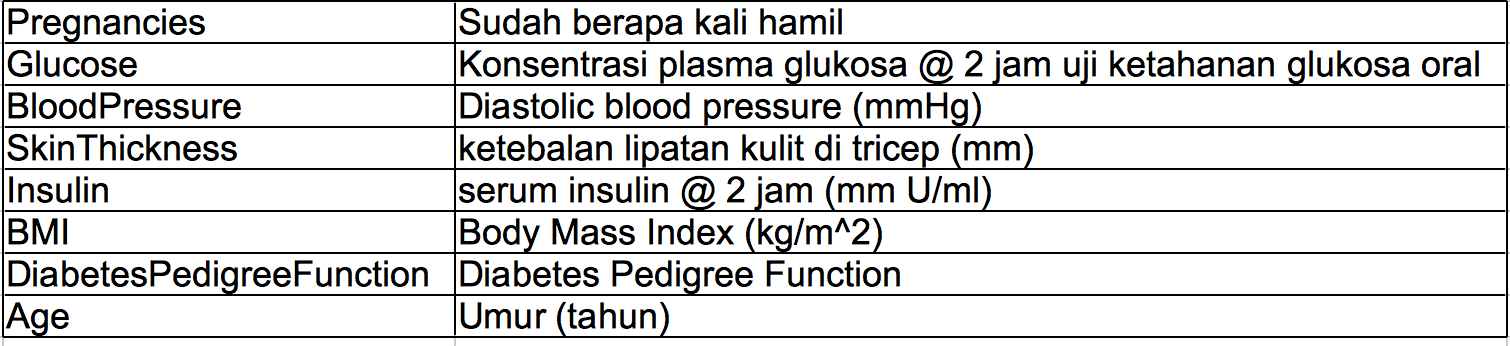

In [3]:
illustration.nomenklatur

# Import Data

modified from source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [4]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


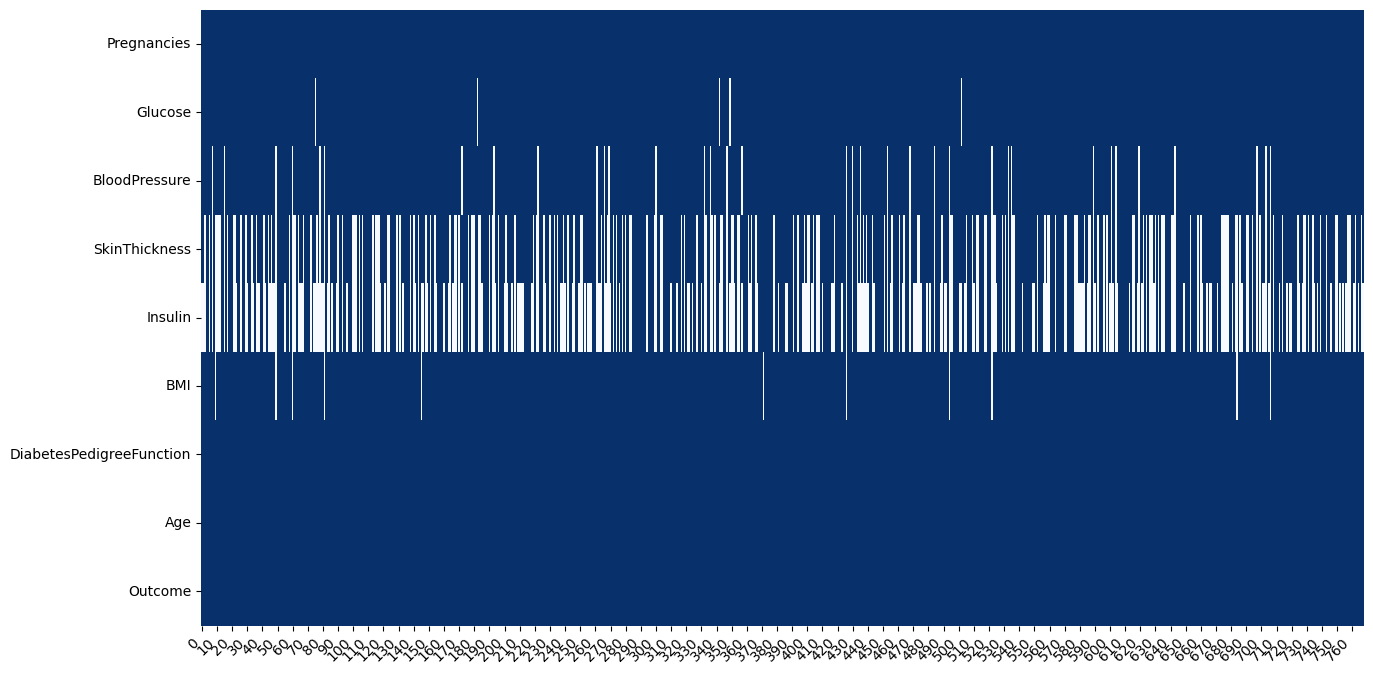

In [5]:
plot_missing_value(df)

In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Dataset Splitting

In [7]:
X = df.drop(columns="Outcome")
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

# Training

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [10]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                             "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'mlp__activation': 'relu', 'mlp__alpha': 0.0003, 'mlp__hidden_layer_sizes': (32, 16, 8), 'mlp__learning_rate_init': 0.005}
0.7117263843648208 0.7247728359636537 0.7012987012987013


# Feature Importance

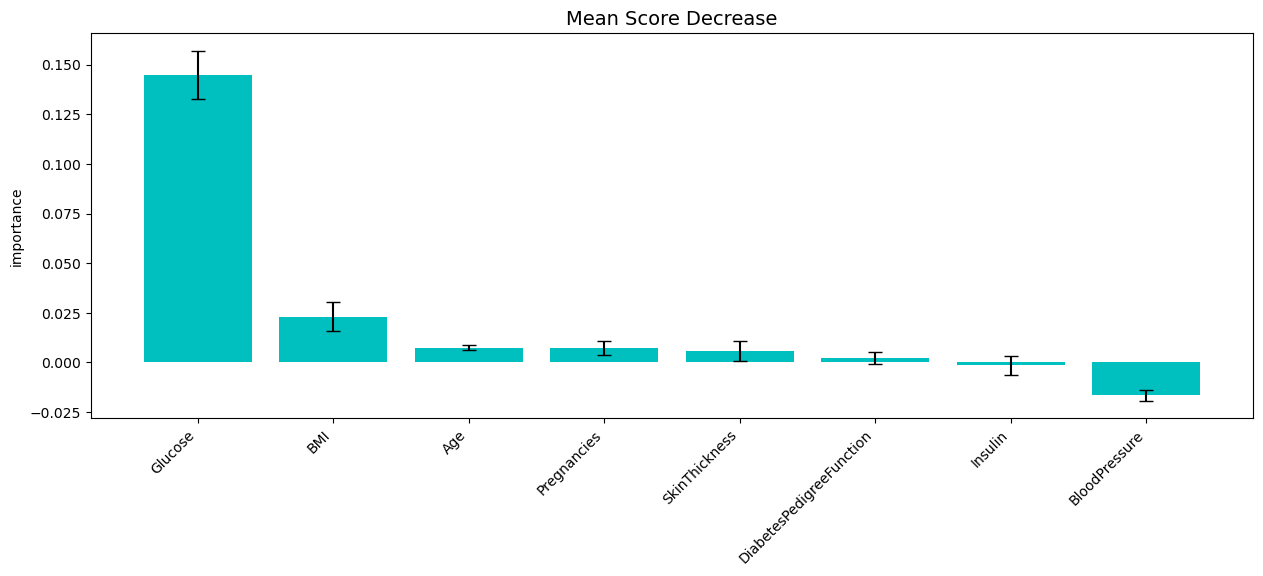

In [11]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

In [12]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, transform='box-cox'), ["Glucose", "BMI", "SkinThickness"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


E:\anaconda3\envs\jcopdl\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
324 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda3\envs\jcopdl\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\jcopdl\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "E:\anaconda3\envs\jcopdl\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "E:\anaconda3\envs\j

ValueError: Data must not be constant.